In [1]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r"C:\Users\91820\OneDrive\Desktop\Downloads\satlog dataset\statlog.csv"
# Read the  dataset from the CSV file
df = pd.read_csv(file_path)

# Calculate mean for the column
mean_bp = df['trestbps'].mean()
print(f"Mean Bp: {mean_bp}")



Mean Bp: 131.34444444444443


# Local Dp

In [2]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame containing 'trestbps' and '_noisy' columns

# Generate Laplace noise
noise = np.random.laplace(loc=0, scale=1/0.5, size=len(df))

# Add noise to the '_noisy' column
df['_noisy'] = df['trestbps'] + noise

# Calculate the mean of the '_noisy' column
mean_noisy = df['_noisy'].mean()

# Calculate the absolute differences
df['abs_difflocaldp'] = np.abs(df['_noisy'] - mean_noisy)

# Calculate the Mean Absolute Error (MAE)
mae = df['abs_difflocaldp'].mean()

# Print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mae)

expected_mean=14.5
accuracy=(1-abs(mae-expected_mean)/expected_mean)*(100)
print("accuracy=",accuracy,"%")


Mean Absolute Error (MAE): 14.320950473217005
accuracy= 98.76517567735866 %


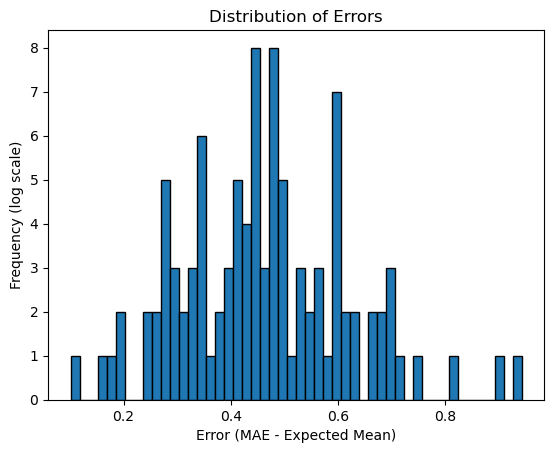

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty list to store MAE errors
mae_errors = []

# Run the code 100 times
for _ in range(100):
    # Assuming 'df' is your DataFrame containing 'trestbps' and '_noisy' columns

    # Generate Laplace noise
    noise = np.random.laplace(loc=0, scale=1/0.5, size=len(df))

    # Add noise to the '_noisy' column
    df['_noisy'] = df['trestbps'] + noise

    # Calculate the mean of the '_noisy' column
    mean_noisy = df['_noisy'].mean()

    # Calculate the absolute differences
    df['abs_difflocaldp'] = np.abs(df['_noisy'] - mean_noisy)

    # Calculate the Mean Absolute Error (MAE)
    mae = df['abs_difflocaldp'].mean()

    # Append the MAE to the list
    mae_errors.append(mae)

# Define the expected mean
expected_mean = 14.5

# Calculate the errors between MAE and expected mean
errors = np.abs(np.array(mae_errors) - expected_mean)

# Plot the errors in a histogram with logarithmic y-axis
plt.hist(errors, bins=50, edgecolor='black')
#plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('Error (MAE - Expected Mean)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Errors')
plt.show()


In [4]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'abs_diffresamplingnoise' is the name of the column
# Replace 'df' with your actual DataFrame variable if it's different
std_deviation = df['abs_difflocaldp'].std()

print(f"Standard Deviation of 'abs_diffresamplingnoise': {std_deviation}")
expected_stdofmean=11.0

accuracy=(1-abs(std_deviation-expected_stdofmean)/expected_stdofmean)*(100)
print("accuracy=",accuracy,"%")


Standard Deviation of 'abs_diffresamplingnoise': 11.566590578991152
accuracy= 94.84917655462588 %


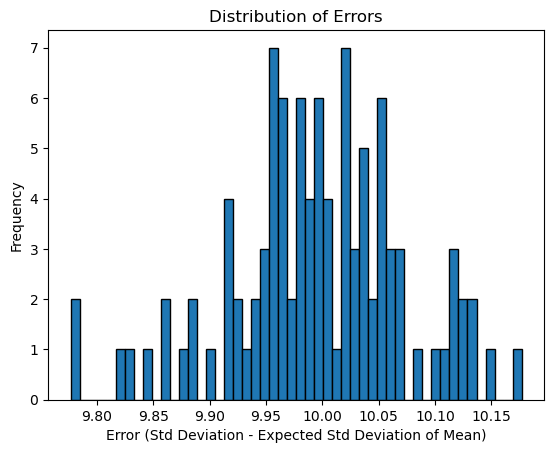

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create an empty list to store standard deviation errors
std_errors = []

# Assuming 'df' is your DataFrame and 'abs_difflocaldp' is the name of the column
# Replace 'df' with your actual DataFrame variable if it's different

# Run the code 100 times
for _ in range(100):
    # Generate random data (you can replace this with your actual data loading)
    df = pd.DataFrame(np.random.randn(100, 1), columns=['abs_difflocaldp'])

    # Calculate the standard deviation
    std_deviation = df['abs_difflocaldp'].std()

    # Define the expected standard deviation of the mean
    expected_stdofmean = 11.0

    # Calculate the error between standard deviation and expected standard deviation
    std_error = np.abs(std_deviation - expected_stdofmean)

    # Append the error to the list
    std_errors.append(std_error)

# Plot the errors in a histogram
plt.hist(std_errors, bins=50, edgecolor='black')
plt.xlabel('Error (Std Deviation - Expected Std Deviation of Mean)')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()
